In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
x_train = iris.data

In [3]:
def build_generator():
    model = Sequential()
    model.add(Dense(128,input_shape=(100,),activation='relu'))
    model.add(Dense(4,activation='linear'))
    return model

In [4]:
def build_discriminator():
    model=Sequential()
    model.add(Dense(128,input_shape=(4,),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [5]:
def build_gan(generator,discriminator):
    discriminator.trainable=False
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [6]:
generator = build_generator()
discriminator=build_discriminator()
gan = build_gan(generator,discriminator)

In [7]:
generator.compile(loss='mean_squared_error',optimizer=Adam(0.0002,0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),metrics = ['accuracy'])
gan.compile(loss='binary_crossentropy',optimizer=Adam(0.0002,0.5))

In [8]:
epochs = 200
batch_size = 16

In [9]:
for epoch in range(epochs):
    idx = np.random.randint(0,x_train.shape[0],batch_size)
    real_samples = x_train[idx]
    fake_samples= generator.predict(np.random.normal(0,1,(batch_size,100)), verbose=0)
    

In [10]:
real_labels = np.ones((batch_size, 1)) 
fake_labels = np.zeros((batch_size, 1))

In [11]:
d_loss_real = discriminator.train_on_batch(real_samples, real_labels) 
d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

In [12]:
noise = np.random.normal(0,1,(batch_size,100))
g_loss = gan.train_on_batch(noise,real_labels)


In [13]:
print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {0.5*(d_loss_real[0]+d_loss_fake[0])} | Genrator Loss: {g_loss}")

Epoch 199/200 | Discriminator Loss: 0.5481011271476746 | Genrator Loss: 0.7809494137763977


In [14]:
synthetic_data = generator.predict(np.random.normal(0,1,(150,100)), verbose = 0)


In [15]:
plt.figure(figsize=(12,8))
plot_idx = 1

<Figure size 1200x800 with 0 Axes>

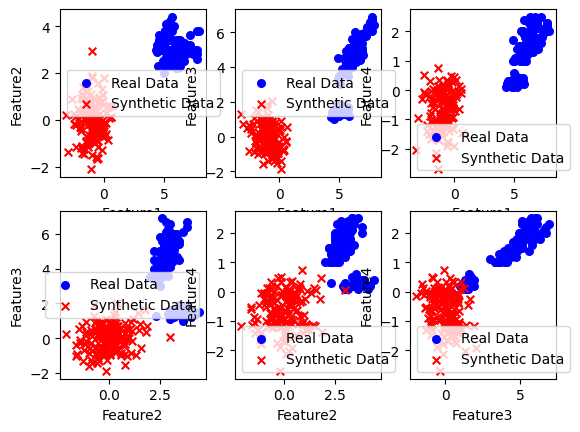

In [16]:
for i in range(4):
    for j in range(i+1,4):
        plt.subplot(2,3,plot_idx)
        plt.scatter(x_train[:,i],x_train[:,j],label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:,i],synthetic_data[:,j],label='Synthetic Data', c ='red', marker='x', s=30)
        plt.xlabel(f'Feature{i+1}')
        plt.ylabel(f'Feature{j+1}')
        plt.legend()
        plot_idx += 1

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>